In [1]:
#Pkg.update("LowRankModels")
using LowRankModels, PyPlot, DataFrames

# Input the Data

In [2]:
y = readtable("C:/Users/Eason/Downloads/winedatayvector.csv")[1]
X = convert(Array,readtable("C:/Users/Eason/Downloads/winedataX.csv")[1:end])

{S}

111243×855 Array{Float64,2}:
 96.0  0.0  1.0  0.0  0.0  0.0  0.0  …  0.0   3.0  0.135  0.865  0.0    1.0
 96.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.142  0.858  0.0    1.0
 96.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0   2.0  0.03   0.97   0.0    1.0
 95.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0   4.0  0.11   0.89   0.0    1.0
 95.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0   1.0  0.076  0.924  0.0    1.0
 95.0  0.0  1.0  0.0  0.0  0.0  0.0  …  0.0   5.0  0.177  0.823  0.0    1.0
 95.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0   0.0  0.07   0.93   0.0    1.0
 95.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.074  0.926  0.0    1.0
 95.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0   0.0  0.103  0.858  0.04   1.0
 95.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0   4.0  0.266  0.734  0.0    1.0
 95.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0   0.0  0.089  0.911  0.0    1.0
 95.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0   4.0  0.078  0.922  0.0    1.0
 95.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0   2.0  0.087  0

, Base

# Run some regressions

In [3]:
function prox_k_sparse_gradient_method(X, y ,w , alpha, iterations=100)
    
    obj_store = zeros(0)
    for i = 1:(iterations)
        z = w - alpha*2*(X'*X*w-X'y)
        w = prox_k_sparse(z,k)
        append!(obj_store,(norm(X*w-y)).^2)
    end
    
    return w,obj_store
end

.Nullable{T

prox_k_sparse_gradient_method (generic function with 2 methods)

In [4]:
function prox_k_sparse(z,k)
    
    set_to_zero_order = sortperm(abs.(z))
    d = length(z)
    w = z
    for i = 1:d-k
        w[set_to_zero_order[i]] = 0
    end
    
    return w
end

}) in module Base

prox_k_sparse (generic function with 1 method)

 at nullable.jl:238

In [5]:
Lipshitz = 2*maximum(svdvals(X)).^2

alpha = (1/Lipshitz)/4

 overwritten in module NullableArrays at C:\Users\Eason\.julia\v0.6\NullableArrays\src\operators.jl:99.


1.451575015561125e-10

The minimum objective value is 

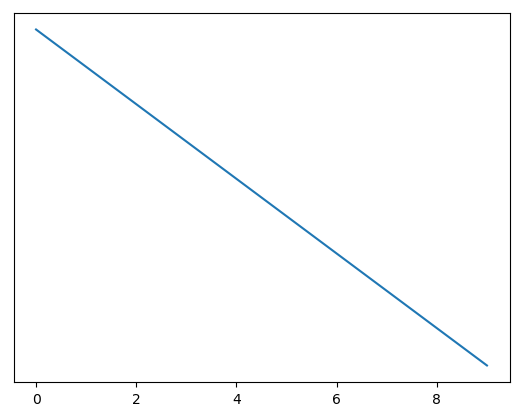

2.8767614266288173e8

In [6]:
w_rand = randn(size(X)[2])
k = 50
w_ksparse, obj_output = prox_k_sparse_gradient_method(X, y, w_rand, alpha, 10)
semilogy(obj_output)
print("The minimum objective value is ",minimum(obj_output))

In [7]:
function stochastic_prox_grad_method(X, y ,w , alpha, iterations=100)
    alphai=alpha/8
    obj_store = zeros(0)
    for j = 1:(iterations)
        i = Integer(ceil(rand()*length(y)))
        yi = y[i]
        xi = X[i,:]
        z = w + alphai*(2*length(y)*((yi-w'*xi)*xi))
        w = prox_k_sparse(z,k)
        append!(obj_store,(norm(X*w-y)).^2)
    end
    
    return w,obj_store
end

stochastic_prox_grad_method (generic function with 2 methods)

2

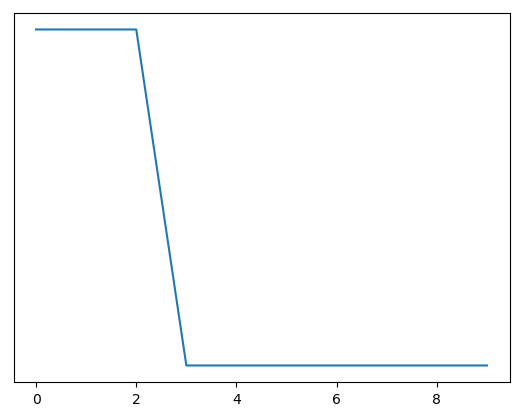

.879625005769162e8

In [8]:
w_rand = randn(size(X)[2])
w_stoch_ksparse,obj_output = stochastic_prox_grad_method(X, y, w_rand, alpha, 10)

semilogy(obj_output)

print(minimum(obj_output))

In [9]:
# proximal gradient method
function proxgrad(loss::Loss, reg::Regularizer, X, y;
                  maxiters::Int = 10, stepsize::Number = 1., 
                  ch::ConvergenceHistory = ConvergenceHistory("proxgrad"))
    w = zeros(size(X,2))
    for t=1:maxiters
        t0 = time()
        # gradient step
        g = grad(loss, X, w, y)
        w = w - stepsize*g
        # prox step
        w = prox(reg, w, stepsize)
        # record objective value
        update_ch!(ch, time() - t0, obj = evaluate(loss, X, w, y) + evaluate(reg, w))
    end
    return w
end

proxgrad (generic function with 1 method)

In [ ]:
n = length(y)
ch = ConvergenceHistory("proxgrad")

w_huber = proxgrad(1/n*HuberLoss(), NonNegConstraint(), X, y, stepsize=alpha, maxiters=100, ch=ch)

plot(ch.objective)
xlabel("iteration")
ylabel("objective")

In [ ]:
n = length(y)
ch = ConvergenceHistory("proxgrad")

w_lasso = proxgrad(1/n*QuadLoss(), OneReg(), X, y, stepsize=alpha, maxiters=100, ch=ch)

plot(ch.objective)
xlabel("iteration")
ylabel("objective")

In [ ]:
n = length(y)
ch = ConvergenceHistory("proxgrad")

w_nnls = proxgrad(1/n*QuadLoss(), NonNegConstraint(), X, y, stepsize=alpha, maxiters=100, ch=ch)

plot(ch.objective)
xlabel("iteration")
ylabel("objective")

In [ ]:
n = length(y)
ch = ConvergenceHistory("proxgrad")

w_nnlasso = proxgrad(1/n*QuadLoss(), NonNegOneReg(), X, y, stepsize=alpha, maxiters=100, ch=ch)

plot(ch.objective)
xlabel("iteration")
ylabel("objective")

In [ ]:
# which fits data best?
scatter(y,X*w_huber,label="ridge",alpha=0.002, color="blue")
plot(y,y,label="true model")
xlim([0,150])
xlabel("true value")
ylabel("predicted value")

In [ ]:
# which fits data best?
scatter(y,X*w_lasso,label="ridge",alpha=0.002, color="green")
plot(y,y,label="true model")
xlim([0,150])
xlabel("true value")
ylabel("predicted value")

In [ ]:
# which fits data best?
scatter(y,X*w_nnls,label="ridge",alpha=0.002, color="red")
plot(y,y,label="true model")
xlim([0,150])
xlabel("true value")
ylabel("predicted value")

In [ ]:
# which fits data best?
scatter(y,X*w_nnlasso,label="ridge",alpha=0.002, color="purple")
plot(y,y,label="true model")
xlim([0,150])
xlabel("true value")
ylabel("predicted value")